<a href="https://colab.research.google.com/github/shaon11579/VAE-2021-/blob/main/R_in_google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
install.packages("tfprobability")
library(tfprobability)
library(tensorflow)
library(tfprobability)
library(keras)
install.packages("ML2Pvae")
library(ML2Pvae)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
qqm <- read.csv("/bin/q-mat/Qmat2.csv")
data <- read.csv("/bin/q-mat/Qmat2_subset.csv")

In [25]:
# Load data
data <- as.matrix(data)
Q <- as.matrix(qqm)

In [26]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(16L, 8L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [27]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_3"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 30)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 16)        496      input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 8)         136      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 32)        288      hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 32)        288      hidden_2[0][0]             
________________________________________________________________________________
z (Co

Model
Model: "model_4"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 32)]                    0           
________________________________________________________________________________
vae_out (Dense)                     (None, 30)                      990         
Total params: 990
Trainable params: 990
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_5"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 30)]                    0           
________________________________________________________________________________
model_3 (Functional)                [(None, 32), (None, 32), (None, 1208        
________________________________________________________________________________
model_4 (Functional)                (None, 30)                      990         
Total params: 2,198
Trainable params: 2,198
Non-trainable params: 0
________________________________________________________________________________



In [28]:
# Model 2: An ML2P-VAE model assuming correlation among traits is known
cov <- as.matrix(correlation_matrix) 
models_cor <- build_vae_correlated(num_items,
                                    num_skills,
                                              Q,
                                               model_type = 2,
                                               mean_vector = means,
                                               covariance_matrix = cov,
                                               enc_hid_arch = enc_arch,
                                                hid_enc_activations = enc_act,
                                                output_activation = out_act,
                                                kl_weight = kl)
encoder_cor <- models_cor[[1]]
decoder_cor <- models_cor[[2]]
vae_cor <- models_cor[[3]]
encoder_cor

ERROR: ignored

In [30]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 30
batch_size <- 16

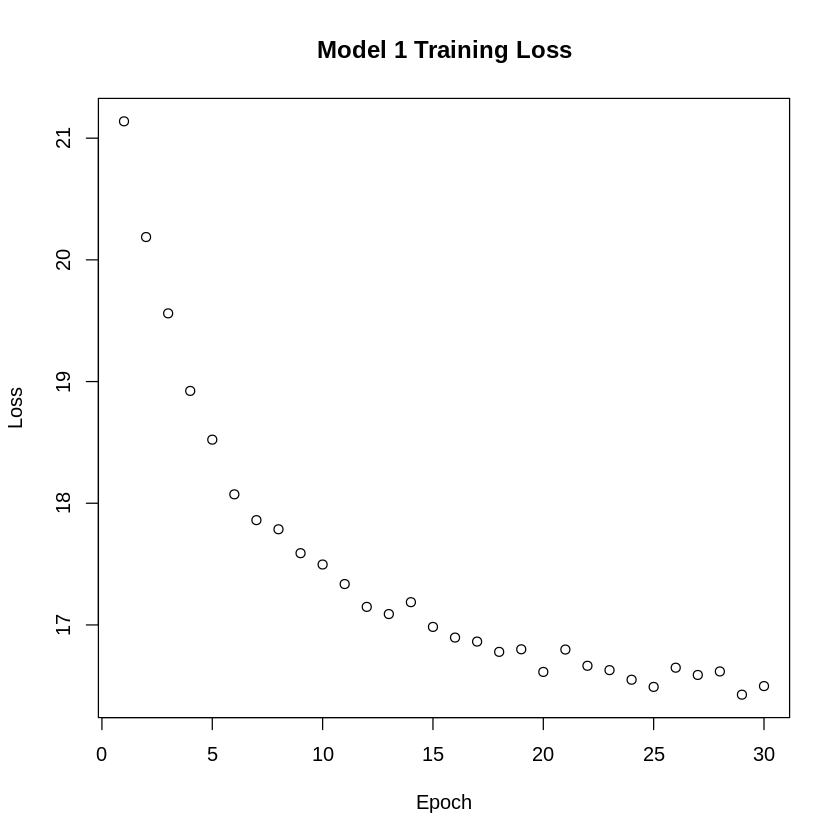

In [31]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [32]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [33]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true)
diff_true <- as.matrix(diff_true) 
theta_true<- as.matrix(theta_true)

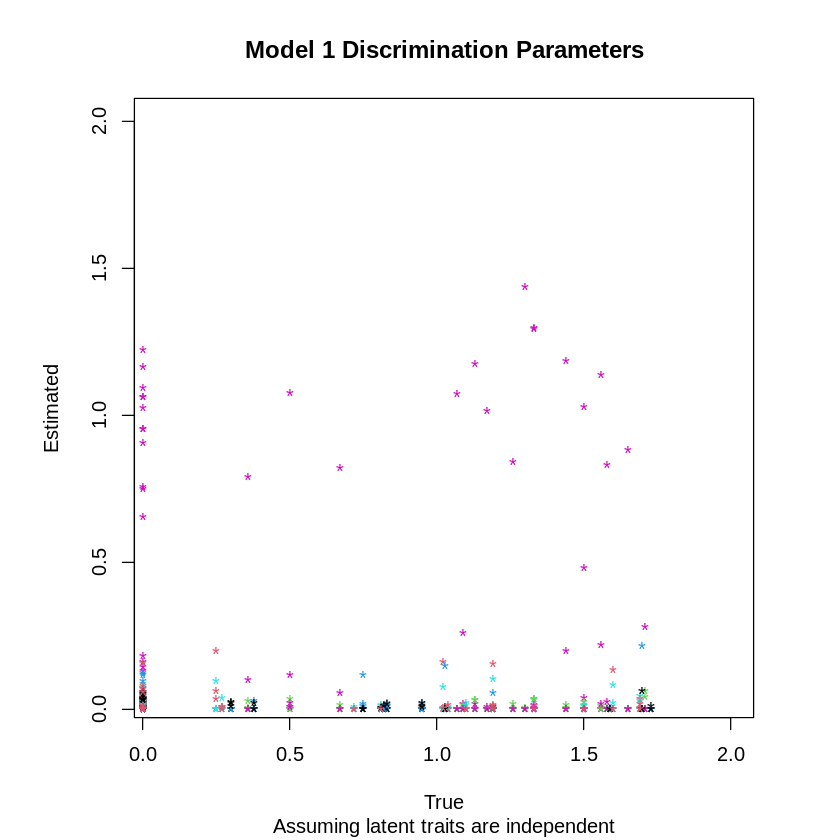

In [34]:
# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05, 2), ylim = c(0.05, 2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')


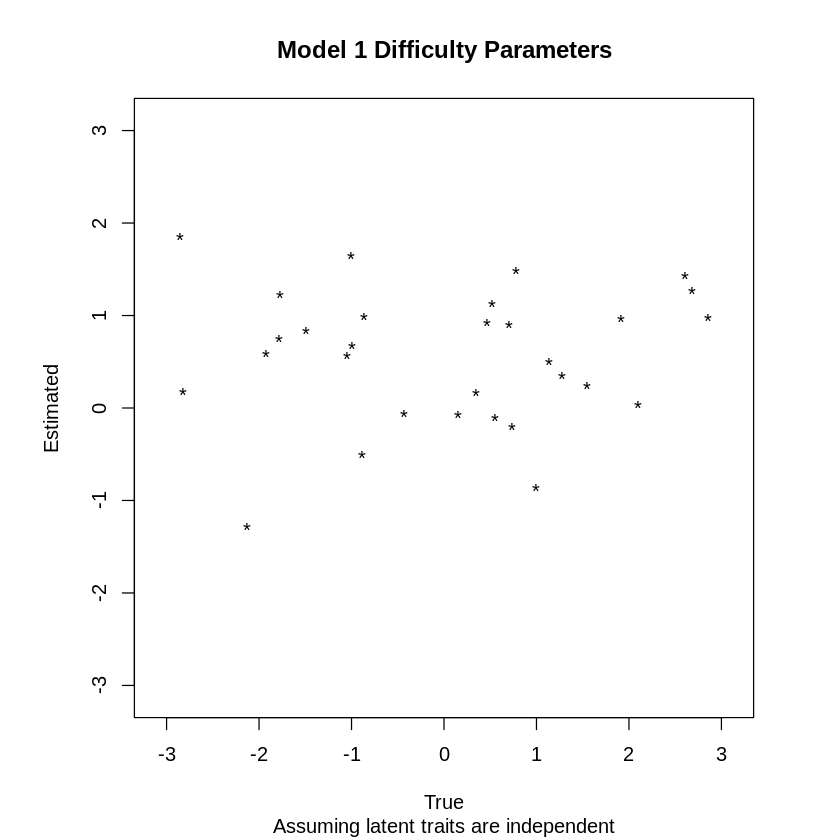

In [35]:
# Discrimination Parameters

par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

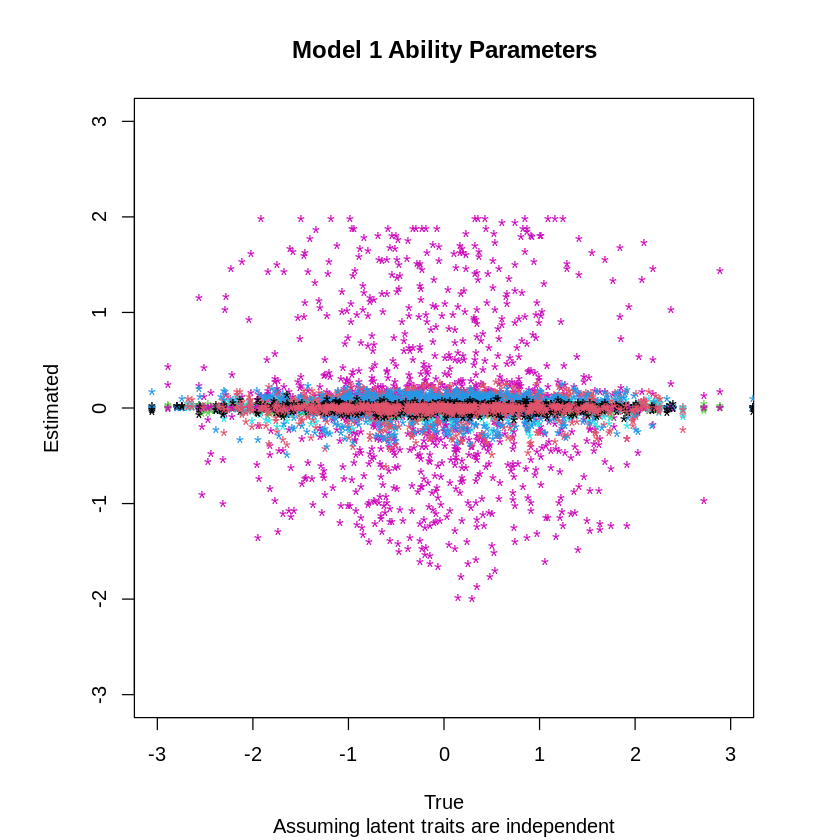

In [37]:
# Ability Parameters
par(pty="s")
matplot(theta_true[3200:3800,],
        all_theta_est_ind[3200:3800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')